In [1]:
pip install nltk pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [10]:
# Part 1: Setup and Data Loading
import pandas as pd
import nltk

# Download required NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')

# Load the CSV data
df = pd.read_csv("Data/exercise1.csv")

# Define emotion columns
human_cols = [
    'frustration','sadness','fear','anger','empathy','gratitude','protectiveness',
    'serenity','joy','hope','friendship','relief','compassion','self_reflection','inspiration'
]
ai_cols = [
    'ai_frustration','ai_sadness','ai_fear','ai_anger','ai_empathy','ai_gratitude',
    'ai_protectiveness','ai_serenity','ai_joy','ai_hope','ai_friendship','ai_relief',
    'ai_compassion','ai_self_reflection','ai_inspiration'
]

# Combine emotion text columns into one per source
df['human_text'] = df[human_cols].fillna('').agg(' '.join, axis=1)
df['ai_text'] = df[ai_cols].fillna('').agg(' '.join, axis=1)

print("Data loaded and emotion text columns combined.")


Data loaded and emotion text columns combined.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MSI/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


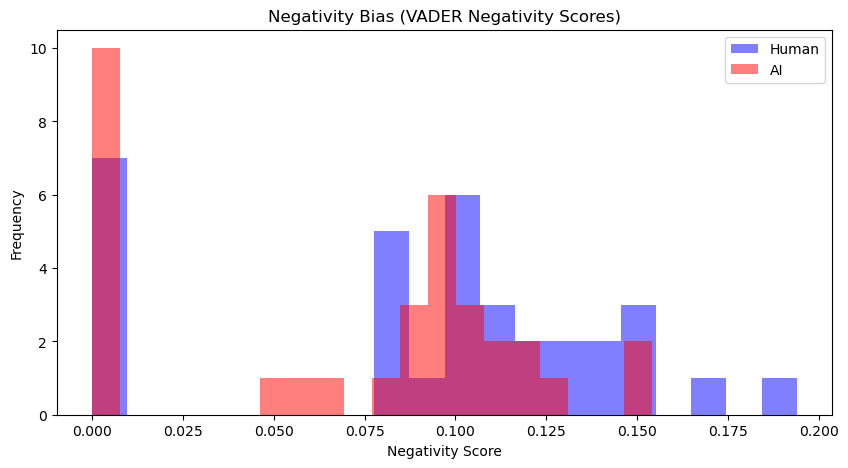

🔹 Negativity Bias Scores:
  - Avg Human Negativity Score: 0.092
  - Avg AI Negativity Score   : 0.070



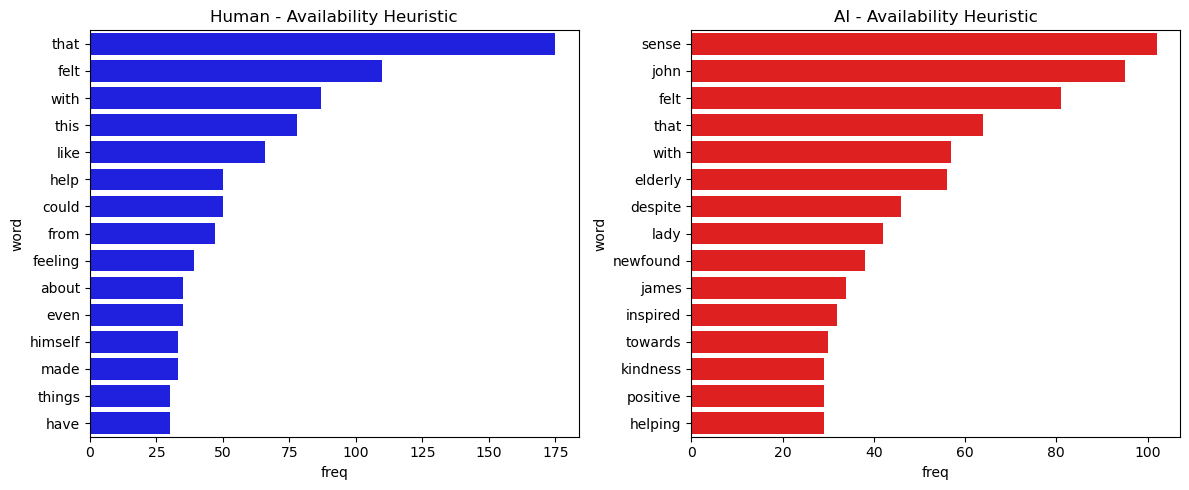

🔹 Availability Heuristic:
  - Most frequent Human word: that (175)
  - Most frequent AI word   : sense (102)



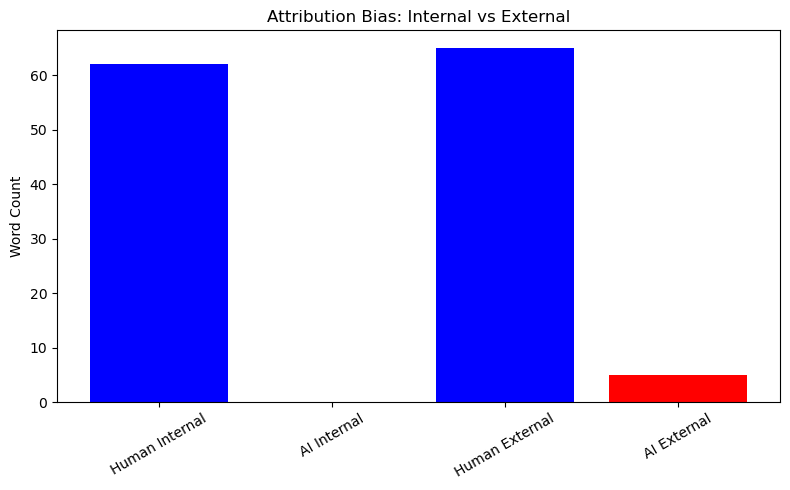

🔹 Attribution Bias:
  - Human Internal: 62
  - AI Internal   : 0
  - Human External: 65
  - AI External   : 5



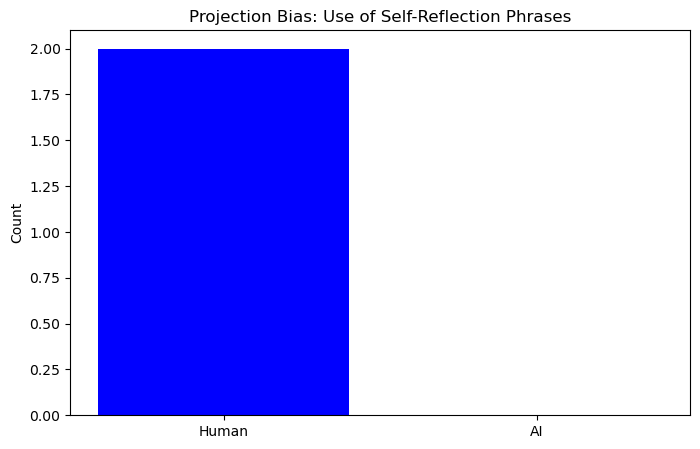

🔹 Projection Bias:
  - Human: 2
  - AI   : 0



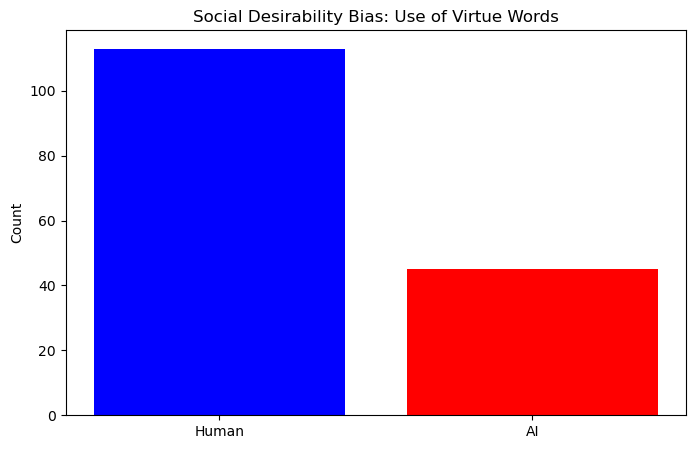

🔹 Social Desirability Bias:
  - Human: 113
  - AI   : 45



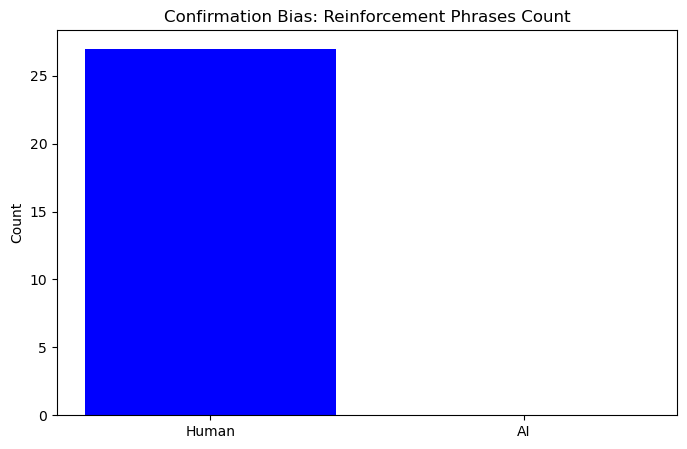

🔹 Confirmation Bias:
  - Human: 27
  - AI   : 0



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Step 1: Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Step 2: Negativity Bias (Mood-Congruent Bias)
df['human_neg'] = df['human_text'].apply(lambda x: sia.polarity_scores(x)['neg'])
df['ai_neg'] = df['ai_text'].apply(lambda x: sia.polarity_scores(x)['neg'])

plt.figure(figsize=(10, 5))
plt.hist(df['human_neg'], alpha=0.5, bins=20, label='Human', color='blue')
plt.hist(df['ai_neg'], alpha=0.5, bins=20, label='AI', color='red')
plt.title("Negativity Bias (VADER Negativity Scores)")
plt.xlabel("Negativity Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("🔹 Negativity Bias Scores:")
print(f"  - Avg Human Negativity Score: {df['human_neg'].mean():.3f}")
print(f"  - Avg AI Negativity Score   : {df['ai_neg'].mean():.3f}\n")

# Step 3: Availability Heuristic
def get_frequent_words(texts, n=15):
    words = ' '.join(texts).lower().split()
    filtered = [word for word in words if word.isalpha() and len(word) > 3]
    return Counter(filtered).most_common(n)

human_words = get_frequent_words(df['human_text'])
ai_words = get_frequent_words(df['ai_text'])

human_df = pd.DataFrame(human_words, columns=['word', 'freq'])
ai_df = pd.DataFrame(ai_words, columns=['word', 'freq'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='freq', y='word', data=human_df, color='blue')
plt.title("Human - Availability Heuristic")

plt.subplot(1, 2, 2)
sns.barplot(x='freq', y='word', data=ai_df, color='red')
plt.title("AI - Availability Heuristic")
plt.tight_layout()
plt.show()

print("🔹 Availability Heuristic:")
print(f"  - Most frequent Human word: {human_df.iloc[0]['word']} ({human_df.iloc[0]['freq']})")
print(f"  - Most frequent AI word   : {ai_df.iloc[0]['word']} ({ai_df.iloc[0]['freq']})\n")

# Step 4: Attribution Bias
internal_words = ['i', 'me', 'my', 'myself']
external_words = ['they', 'them', 'their', 'because', 'blame', 'fault']

def count_attribution(text, words):
    tokens = text.lower().split()
    return sum(1 for token in tokens if token in words)

df['human_internal'] = df['human_text'].apply(lambda x: count_attribution(x, internal_words))
df['ai_internal'] = df['ai_text'].apply(lambda x: count_attribution(x, internal_words))
df['human_external'] = df['human_text'].apply(lambda x: count_attribution(x, external_words))
df['ai_external'] = df['ai_text'].apply(lambda x: count_attribution(x, external_words))

labels = ['Human Internal', 'AI Internal', 'Human External', 'AI External']
values = [
    df['human_internal'].sum(),
    df['ai_internal'].sum(),
    df['human_external'].sum(),
    df['ai_external'].sum()
]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'red', 'blue', 'red'])
plt.title("Attribution Bias: Internal vs External")
plt.ylabel("Word Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print("🔹 Attribution Bias:")
print(f"  - Human Internal: {df['human_internal'].sum()}")
print(f"  - AI Internal   : {df['ai_internal'].sum()}")
print(f"  - Human External: {df['human_external'].sum()}")
print(f"  - AI External   : {df['ai_external'].sum()}\n")

# Step 5: Projection Bias
projection_phrases = ['i feel', 'i think', 'i believe', 'i guess']

def count_projection(text):
    text = text.lower()
    return sum(text.count(phrase) for phrase in projection_phrases)

df['human_proj'] = df['human_text'].apply(count_projection)
df['ai_proj'] = df['ai_text'].apply(count_projection)

plt.figure(figsize=(8, 5))
plt.bar(['Human', 'AI'], [df['human_proj'].sum(), df['ai_proj'].sum()], color=['blue', 'red'])
plt.title("Projection Bias: Use of Self-Reflection Phrases")
plt.ylabel("Count")
plt.show()

print("🔹 Projection Bias:")
print(f"  - Human: {df['human_proj'].sum()}")
print(f"  - AI   : {df['ai_proj'].sum()}\n")

# Step 6: Social Desirability Bias
virtue_words = ['help', 'kind', 'honest', 'good', 'nice', 'positive', 'always']

def count_virtue(text):
    tokens = text.lower().split()
    return sum(1 for token in tokens if token in virtue_words)

df['human_virtue'] = df['human_text'].apply(count_virtue)
df['ai_virtue'] = df['ai_text'].apply(count_virtue)

plt.figure(figsize=(8, 5))
plt.bar(['Human', 'AI'], [df['human_virtue'].sum(), df['ai_virtue'].sum()], color=['blue', 'red'])
plt.title("Social Desirability Bias: Use of Virtue Words")
plt.ylabel("Count")
plt.show()

print("🔹 Social Desirability Bias:")
print(f"  - Human: {df['human_virtue'].sum()}")
print(f"  - AI   : {df['ai_virtue'].sum()}\n")

# Step 7: Confirmation Bias
confirmation_phrases = ['of course', 'obviously', 'clearly', 'everyone knows', 'always', 'never']

def count_confirmation(text):
    text = text.lower()
    return sum(text.count(phrase) for phrase in confirmation_phrases)

df['human_confirm'] = df['human_text'].apply(count_confirmation)
df['ai_confirm'] = df['ai_text'].apply(count_confirmation)

plt.figure(figsize=(8, 5))
plt.bar(['Human', 'AI'], [df['human_confirm'].sum(), df['ai_confirm'].sum()], color=['blue', 'red'])
plt.title("Confirmation Bias: Reinforcement Phrases Count")
plt.ylabel("Count")
plt.show()

print("🔹 Confirmation Bias:")
print(f"  - Human: {df['human_confirm'].sum()}")
print(f"  - AI   : {df['ai_confirm'].sum()}\n")


In [4]:
# Part 2: Sentiment Polarity Skew Detection
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']  # Range from -1 (negative) to +1 (positive)

# Apply to both sources
df['human_sentiment'] = df['human_text'].apply(get_sentiment)
df['ai_sentiment'] = df['ai_text'].apply(get_sentiment)

# Output average sentiment
print("Average Sentiment Scores:")
print(f"Human: {df['human_sentiment'].mean():.3f}")
print(f"AI: {df['ai_sentiment'].mean():.3f}")


Average Sentiment Scores:
Human: 0.558
AI: 0.694


In [5]:
# Part 3: Stereotyping Detection using keyword heuristics
from nltk.tokenize import word_tokenize

# Basic list of identity/stereotype-related keywords
stereotype_keywords = [
    'woman', 'man', 'girl', 'boy', 'black', 'white', 'asian', 'muslim',
    'christian', 'jewish', 'gay', 'straight', 'disabled', 'old', 'young'
]

def count_stereotypes(text):
    tokens = word_tokenize(text.lower())
    return sum(1 for token in tokens if token in stereotype_keywords)

df['human_stereotypes'] = df['human_text'].apply(count_stereotypes)
df['ai_stereotypes'] = df['ai_text'].apply(count_stereotypes)

# Output totals
print("\nStereotyping Keyword Frequency:")
print(f"Human: {df['human_stereotypes'].sum()} total mentions")
print(f"AI: {df['ai_stereotypes'].sum()} total mentions")



Stereotyping Keyword Frequency:
Human: 51 total mentions
AI: 18 total mentions


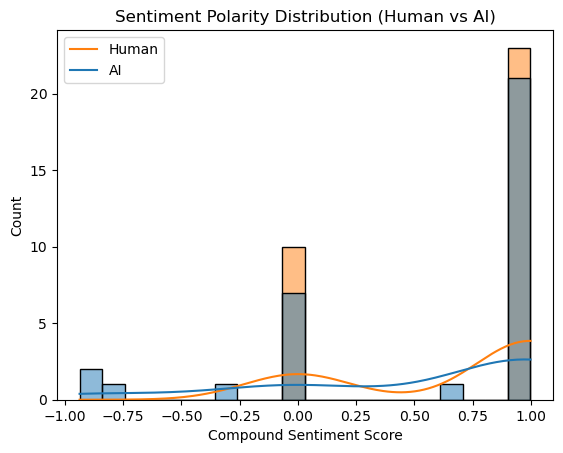

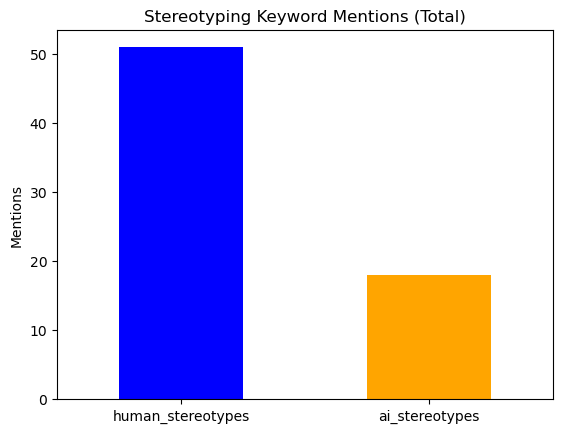

In [6]:
# Part 4: Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.histplot(df[['human_sentiment', 'ai_sentiment']], kde=True, bins=20)
plt.title("Sentiment Polarity Distribution (Human vs AI)")
plt.xlabel("Compound Sentiment Score")
plt.legend(["Human", "AI"])
plt.show()

# Plot total stereotype mentions
df[['human_stereotypes', 'ai_stereotypes']].sum().plot(kind='bar', color=['blue', 'orange'])
plt.title("Stereotyping Keyword Mentions (Total)")
plt.ylabel("Mentions")
plt.xticks(rotation=0)
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


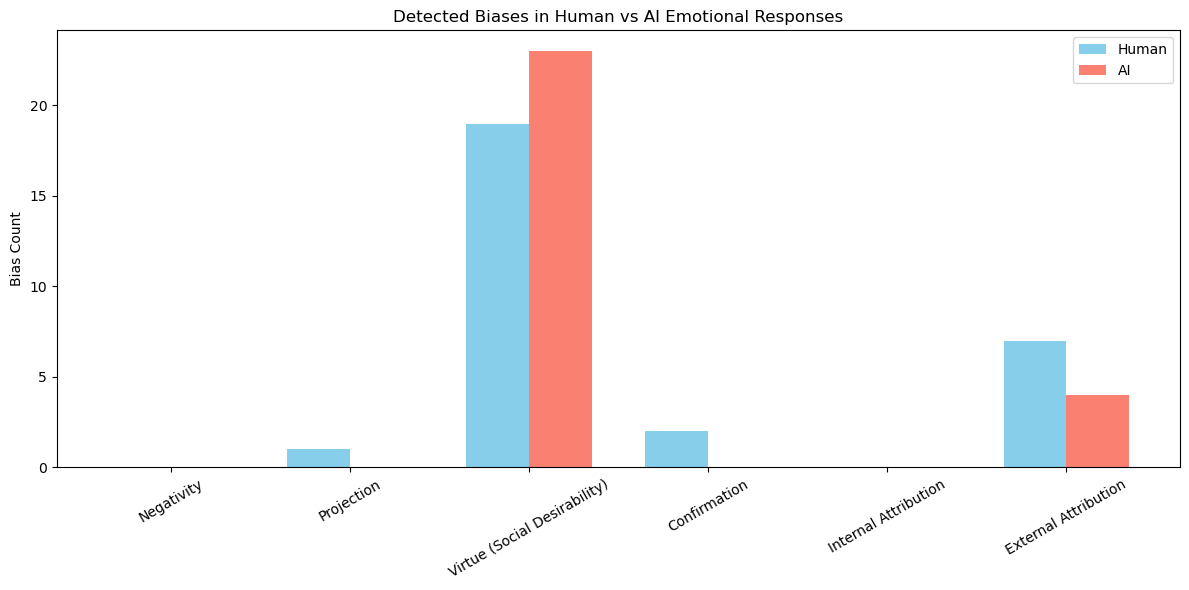

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import re

# Run once to download sentiment model
nltk.download('vader_lexicon')

# Load CSV
df = pd.read_csv("Data/exercise1.csv")

# Emotion columns
human_cols = [
    'frustration', 'sadness', 'fear', 'anger', 'empathy', 'gratitude',
    'protectiveness', 'serenity', 'joy', 'hope', 'friendship', 'relief',
    'compassion', 'self_reflection', 'inspiration'
]
ai_cols = [f'ai_{col}' for col in human_cols]

# Combine text
df['human_emotion_text'] = df[human_cols].fillna('').agg(' '.join, axis=1)
df['ai_emotion_text'] = df[ai_cols].fillna('').agg(' '.join, axis=1)

# Sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Negativity bias
df['human_neg'] = df['human_emotion_text'].apply(lambda x: sia.polarity_scores(x)['neg'] > 0.5)
df['ai_neg'] = df['ai_emotion_text'].apply(lambda x: sia.polarity_scores(x)['neg'] > 0.5)

# Projection bias
def detect_projection(text):
    return bool(re.search(r'\b(I think|I feel|I believe|In my opinion)\b', text, re.IGNORECASE))

df['human_proj'] = df['human_emotion_text'].apply(detect_projection)
df['ai_proj'] = df['ai_emotion_text'].apply(detect_projection)

# Social desirability bias (virtue words)
virtue_words = ['honest', 'loyal', 'kind', 'respect', 'responsible', 'integrity', 'brave', 'fair']

def contains_virtue(text):
    return any(word in text.lower() for word in virtue_words)

df['human_virtue'] = df['human_emotion_text'].apply(contains_virtue)
df['ai_virtue'] = df['ai_emotion_text'].apply(contains_virtue)

# Confirmation bias
confirmation_words = ['obviously', 'clearly', 'as expected', 'as I thought', 'evidently']

def contains_confirmation(text):
    return any(phrase in text.lower() for phrase in confirmation_words)

df['human_confirm'] = df['human_emotion_text'].apply(contains_confirmation)
df['ai_confirm'] = df['ai_emotion_text'].apply(contains_confirmation)

# Attribution bias
internal_words = ['because I', 'due to my', 'since I', 'as I']
external_words = ['because of', 'due to', 'since they', 'as they']

def detect_internal(text):
    return any(phrase in text.lower() for phrase in internal_words)

def detect_external(text):
    return any(phrase in text.lower() for phrase in external_words)

df['human_internal'] = df['human_emotion_text'].apply(detect_internal)
df['human_external'] = df['human_emotion_text'].apply(detect_external)
df['ai_internal'] = df['ai_emotion_text'].apply(detect_internal)
df['ai_external'] = df['ai_emotion_text'].apply(detect_external)

# Visualization
biases = [
    "Negativity", "Projection", "Virtue (Social Desirability)",
    "Confirmation", "Internal Attribution", "External Attribution"
]

human_counts = [
    df['human_neg'].sum(), df['human_proj'].sum(), df['human_virtue'].sum(),
    df['human_confirm'].sum(), df['human_internal'].sum(), df['human_external'].sum()
]

ai_counts = [
    df['ai_neg'].sum(), df['ai_proj'].sum(), df['ai_virtue'].sum(),
    df['ai_confirm'].sum(), df['ai_internal'].sum(), df['ai_external'].sum()
]

x = range(len(biases))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - width/2 for i in x], human_counts, width, label='Human', color='skyblue')
plt.bar([i + width/2 for i in x], ai_counts, width, label='AI', color='salmon')
plt.xticks(ticks=x, labels=biases, rotation=30)
plt.ylabel("Bias Count")
plt.title("Detected Biases in Human vs AI Emotional Responses")
plt.legend()
plt.tight_layout()
plt.show()
